# <center>**EMPLOYEE ATTRITION PREDICTION**</center>

# <center>**Hasbi Thaufik Oktodila**</center>

<br>
<br>
<br>
<br>
<br>
<br>


# **I. Objective**

A survey from _PriceWaterhouseCoopers_ revealed that 25% of US workers quit their jobs in 2021. In August 2021 alone, 4.3 million people quit. Nearly two-thirds (65%) were actively seeking a new job. It’s unsurprising then that labor shortages and recruitment are the biggest problems for HR Managers. How can HR teams address the growing employee turnover? What changes must organizations make now to arrest the trend? And what role can employee communications play in bringing this to life?

This high resignation and attrition rate makes company on a cold feet. Suitable and capable employee is hard to find. New projects are always coming. Attrition rate will cost company a huge time and money waste. We need to investigate why these employees resigned on the first place. What factors influence their resignation? What can we do to improve company's quality to reduce this attrition rate? If we can predict their resignation, we can investigate further what we can do to improve company's quality and stability.

This project is aimed to predict employee's chance of attrition to base our decision on what to do with this attrition rate. If we can predict their resignation, HR can act early to prevent this. There's so many option HR can do, whether interview the predicted ones, or maybe take a further surveys to reduce this resignation rate. This project is aimed to increase company's efficiency on dealing with attrition rate.

# **II. Importing Libraries**

In [146]:
import pandas as pd             # dataframe handling
import numpy as np              # math operation and arrays handling
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # plotting

# sklearn
from sklearn.model_selection import train_test_split                        # splitting dataframe for train-test

# sklearn for model definition
from sklearn.linear_model import LogisticRegression                         # logistic regression
from sklearn.svm import SVC                                                 # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier                         # Random Forest
from sklearn.tree import DecisionTreeClassifier                             # Decision Tree
from sklearn.neighbors import KNeighborsClassifier                          # KNN
from sklearn.naive_bayes import GaussianNB                                  # Naive Bayes
from sklearn.ensemble import AdaBoostClassifier                             # ADA Boost         

# sklearn for cross validation
from sklearn.model_selection import cross_val_score

# sklearn for feature selection
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif   # F-test, selectKbest, mutual_info_classification

# sklearn for scaling
from sklearn.preprocessing import MinMaxScaler

# sklearn for hyperparameter tuning with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer      # Needed for Naive Bayes Hyperparameter tuning

# sklearn for metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# warning settings
import warnings
warnings.filterwarnings(action='ignore')    # ignore warnings

# **II. Data Loading**

In [147]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


> Checking data's info

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> Checking null values

In [149]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

> Checking duplicates

In [150]:
df.duplicated().any()

False

> Comparing the attrition rate between yes and no

In [151]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

> Changing all the column name to lowercase for easier data processing

In [152]:
df.columns= df.columns.str.lower()
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

# **III. Data Cleaning**

> Checking the data types (Categoricals or numericals)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dailyrate'}>,
        <AxesSubplot:title={'center':'distancefromhome'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'employeecount'}>],
       [<AxesSubplot:title={'center':'employeenumber'}>,
        <AxesSubplot:title={'center':'environmentsatisfaction'}>,
        <AxesSubplot:title={'center':'hourlyrate'}>,
        <AxesSubplot:title={'center':'jobinvolvement'}>,
        <AxesSubplot:title={'center':'joblevel'}>],
       [<AxesSubplot:title={'center':'jobsatisfaction'}>,
        <AxesSubplot:title={'center':'monthlyincome'}>,
        <AxesSubplot:title={'center':'monthlyrate'}>,
        <AxesSubplot:title={'center':'numcompaniesworked'}>,
        <AxesSubplot:title={'center':'percentsalaryhike'}>],
       [<AxesSubplot:title={'center':'performancerating'}>,
        <AxesSubplot:title={'center':'relationshipsatisfaction'}>,
        <AxesSubplot:title={'cen

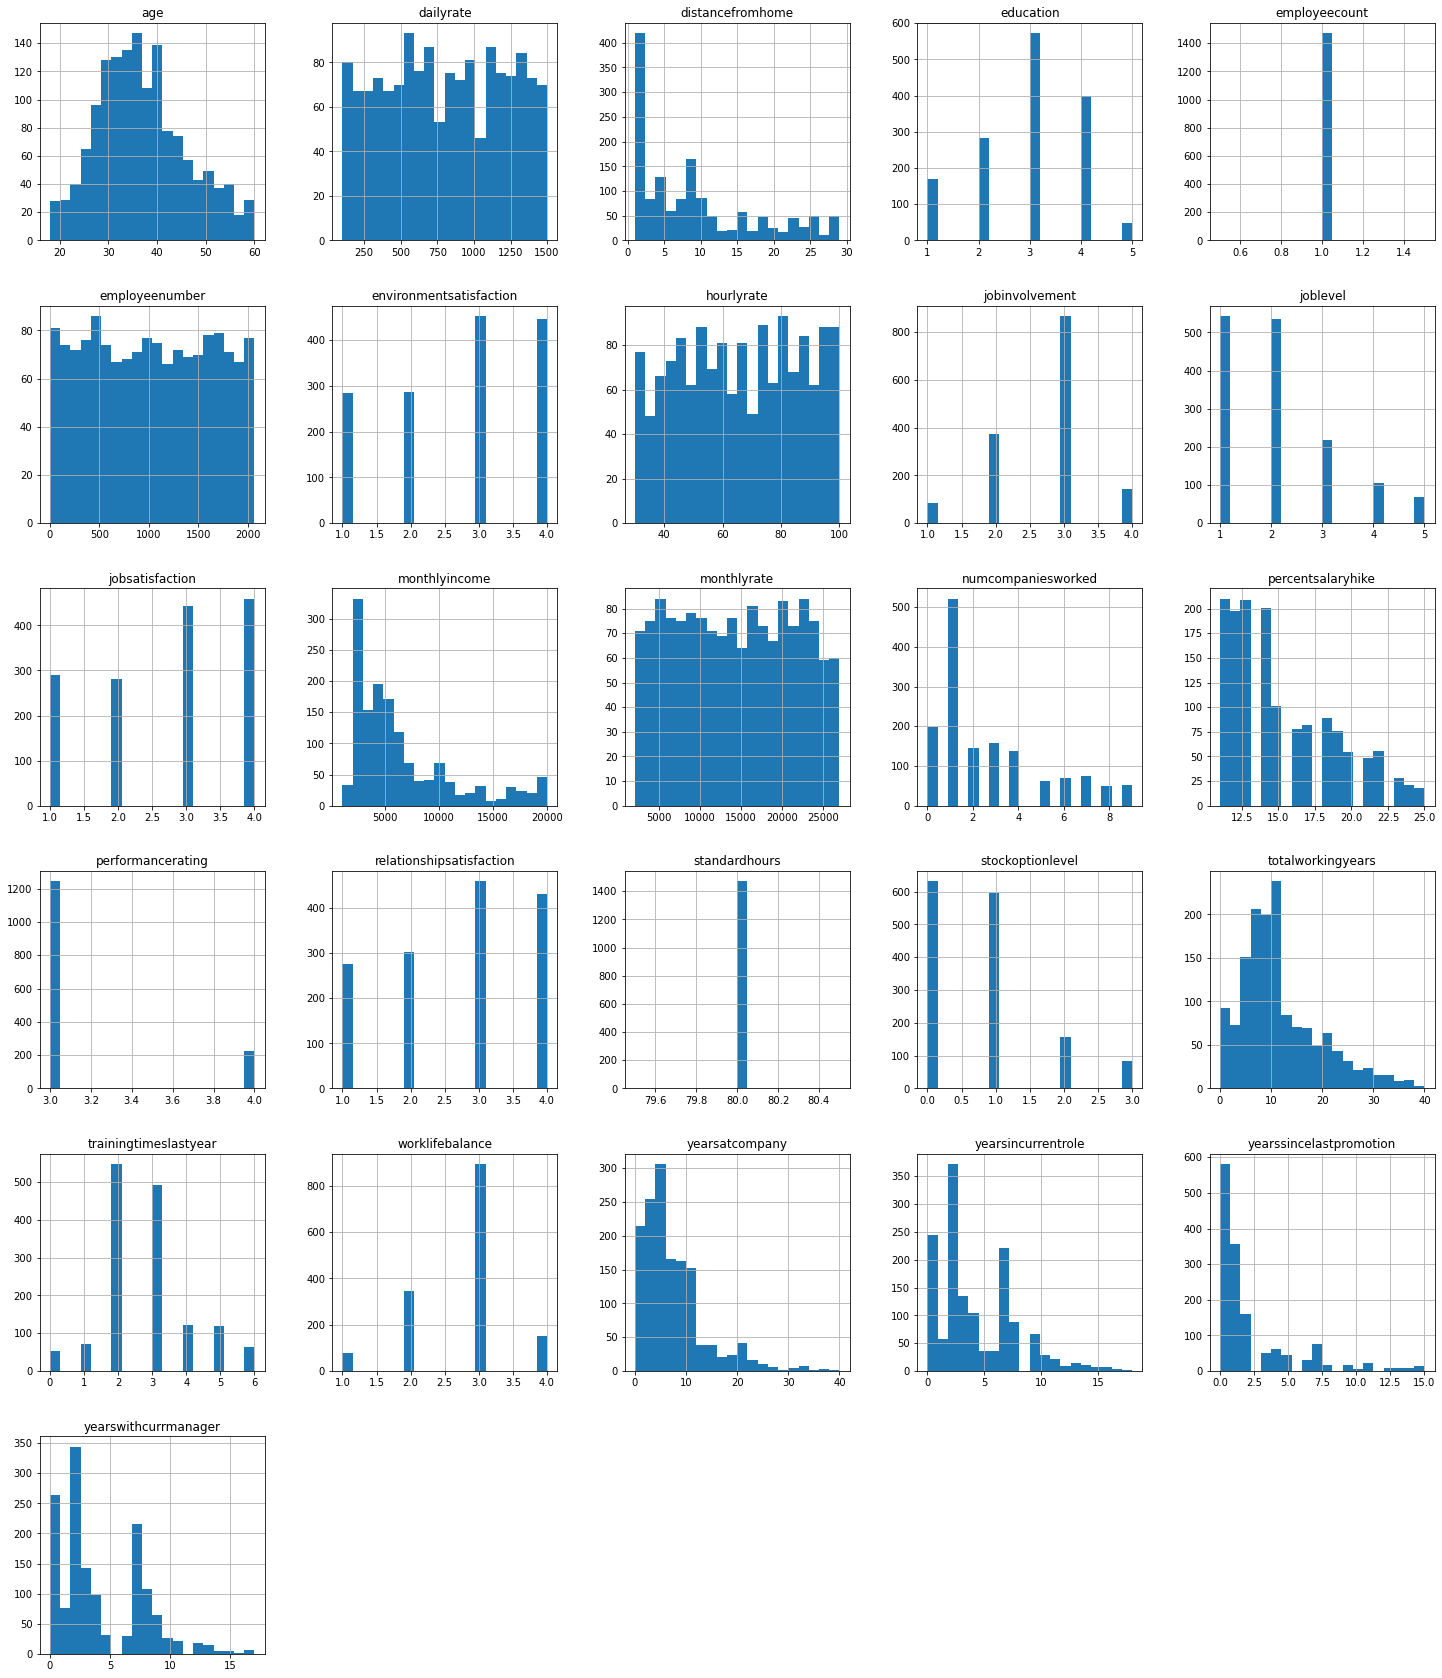

In [153]:
df.hist(figsize = (25,30), bins=20)

> Slicing all the object datatype

In [154]:
df.select_dtypes(include=[object])


,attrition,businesstravel,department,educationfield,gender,jobrole,maritalstatus,over18,overtime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [155]:
df.select_dtypes(include=[object]).columns

Index(['attrition', 'businesstravel', 'department', 'educationfield', 'gender',
       'jobrole', 'maritalstatus', 'over18', 'overtime'],
      dtype='object')

> Conclusion of all datatypes:

> categoricals
- string:
    - businesstravel
    - department
    - educationfield
    - gender
    - jobrole
    - maritalstatus
    - over18
    - overtime

- int/float:
    - education
    - employeecount - _will be dropped since only have 1 value_
    - environment_satisfaction
    - jobinvolvement
    - joblevel
    - jobsatisfaction
    - performanceting
    - relationshipsatisfaction
    - standardhours - _will be dropped since only have 1 value_
    - stockoptionlevel
    - worklifebalance

> numericals
- age
- dailyrate
- distancefromhome
- employeenumber
- hourlyrate
- monthlyincome
- monthlyrate
- percentsalaryhike
- totalworkingyears
- yearsatcompany
- yearsincurrentrole
- yearssincelastpromotion
- yearswithcurrmanager

In [156]:
df.over18.value_counts()

Y    1470
Name: over18, dtype: int64

In [157]:
df.drop(columns = ['employeecount', 'standardhours', 'over18'], axis=1, inplace=True)

In [158]:
for x in df.select_dtypes(include=[object]).columns:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In attrition:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In businesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
 Total Value: 3
----------------------------------------------------------------------------------------------------
Value In department:  ['Sales' 'Research & Development' 'Human Resources'] 
 Total Value: 3
----------------------------------------------------------------------------------------------------
Value In educationfield:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
 Total Value: 6
----------------------------------------------------------------------------------------------------
Value In gender:  ['Female' 'Male'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In jobrole:  ['Sales Executive' 'Research Scientist' 'Laboratory Techn

> Changing str value that has order to int.

In [159]:
df['attrition'] = df['attrition'].str.replace('Yes', '1')
df['attrition'] = df['attrition'].str.replace('No', '0')
df['attrition'] = df['attrition'].astype(int)

df["businesstravel"] = df['businesstravel'].str.replace('Non-Travel', '1')
df["businesstravel"] = df['businesstravel'].str.replace('Travel_Rarely', '2')
df["businesstravel"] = df['businesstravel'].str.replace('Travel_Frequently', '3')
df['businesstravel'] = df['businesstravel'].astype(int)

df['gender'] = df['gender'].str.replace('Male', '1')
df['gender'] = df['gender'].str.replace('Female', '2')
df['gender'] = df['gender'].astype(int)

df['overtime'] = df['overtime'].str.replace('Yes', '1')
df['overtime'] = df['overtime'].str.replace('No', '0')
df['overtime'] = df['overtime'].astype(int)


> Notes:
- Attrition : Yes = 1, No = 0
- Businesstravel : Non-Travel = 1, Travel_Rarely = 2, Travel_Frequently = 3
- gender : Male = 1, Female = 2
- overtime : Yes = 1, No = 0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1470 non-null   int64 
 1   attrition                 1470 non-null   int64 
 2   businesstravel            1470 non-null   int64 
 3   dailyrate                 1470 non-null   int64 
 4   department                1470 non-null   object
 5   distancefromhome          1470 non-null   int64 
 6   education                 1470 non-null   int64 
 7   educationfield            1470 non-null   object
 8   employeenumber            1470 non-null   int64 
 9   environmentsatisfaction   1470 non-null   int64 
 10  gender                    1470 non-null   int64 
 11  hourlyrate                1470 non-null   int64 
 12  jobinvolvement            1470 non-null   int64 
 13  joblevel                  1470 non-null   int64 
 14  jobrole                 

# **IV. Data Splitting**

Splitting the Inference, Train, and Test

> Inference

In [161]:
df_inf = df.sample(5, random_state=42069)
df = df.drop(df_inf.index)

print('Inference Shape: ', df_inf.shape)
print('Main Dataframe Shape',df.shape)

Inference Shape:  (5, 32)
Main Dataframe Shape (1465, 32)


> X and Y

In [162]:
dfmodel = df.copy()
X = dfmodel.drop(['attrition'], axis=1)
y = dfmodel['attrition']

print(X.shape)
print(y.shape)

(1465, 31)
(1465,)


> Train and Test

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42, stratify=y)

print('===TRAIN SHAPE===')
print(X_train.shape)
print(y_train.shape)

print('\n ===TEST SHAPE===')
print(X_test.shape)
print(y_test.shape)

===TRAIN SHAPE===
(1128, 31)
(1128,)

 ===TEST SHAPE===
(337, 31)
(337,)


# **V. Exploratory Data Analysis**

In [164]:
df_eda = X_train.copy()
df_eda['attrition'] = y_train
df_eda.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
78,37,2,397,Research & Development,7,4,Medical,102,1,1,30,3,3,Research Director,3,Single,13664,25258,4,0,13,3,1,0,16,3,4,5,2,0,2,0
854,45,2,1457,Research & Development,7,3,Medical,1195,1,2,83,3,1,Research Scientist,3,Married,4477,20100,4,1,19,3,3,1,7,2,2,3,2,0,2,0
1438,23,3,638,Sales,9,3,Marketing,2023,4,1,33,3,1,Sales Representative,1,Married,1790,26956,1,0,19,3,1,1,1,3,2,1,0,1,0,1
595,58,2,286,Research & Development,2,4,Life Sciences,825,4,1,31,3,5,Research Director,2,Single,19246,25761,7,1,12,3,4,0,40,2,3,31,15,13,8,1
1365,29,3,746,Sales,24,3,Technical Degree,1928,3,1,45,4,1,Sales Representative,1,Single,1091,10642,1,0,17,3,4,0,1,3,3,1,0,0,0,1


In [165]:
df_eda.columns

Index(['age', 'businesstravel', 'dailyrate', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition'],
      dtype='object')

In [166]:
categoricals = ['businesstravel','department','educationfield','gender','jobrole','maritalstatus','overtime']
numericals = ['age','dailyrate','distancefromhome','employeenumber','hourlyrate','monthlyincome','monthlyrate',
              'percentsalaryhike','totalworkingyears','yearsatcompany','yearsincurrentrole','yearssincelastpromotion','yearswithcurrmanager']

In [167]:
len(categoricals)

7

## **1. Bivariate Analysis**

<AxesSubplot:ylabel='attrition'>

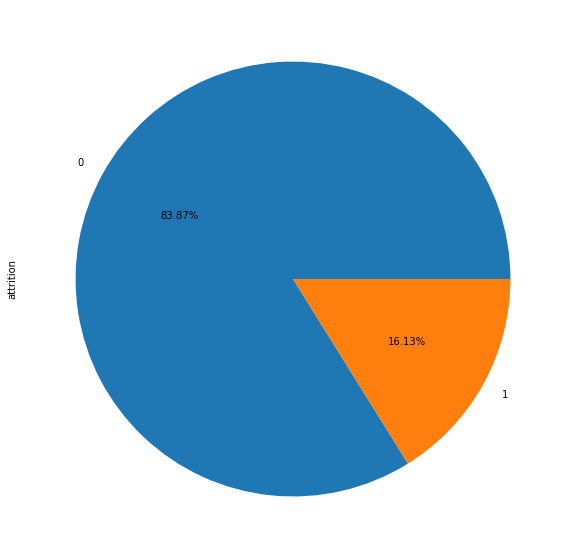

In [259]:
df_eda['attrition'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')

> From across the data, employee attrition is 16.13% compared to employee who stays (83.87%). It seems that this company is pretty loyal to their company

> **Categoricals to Target**

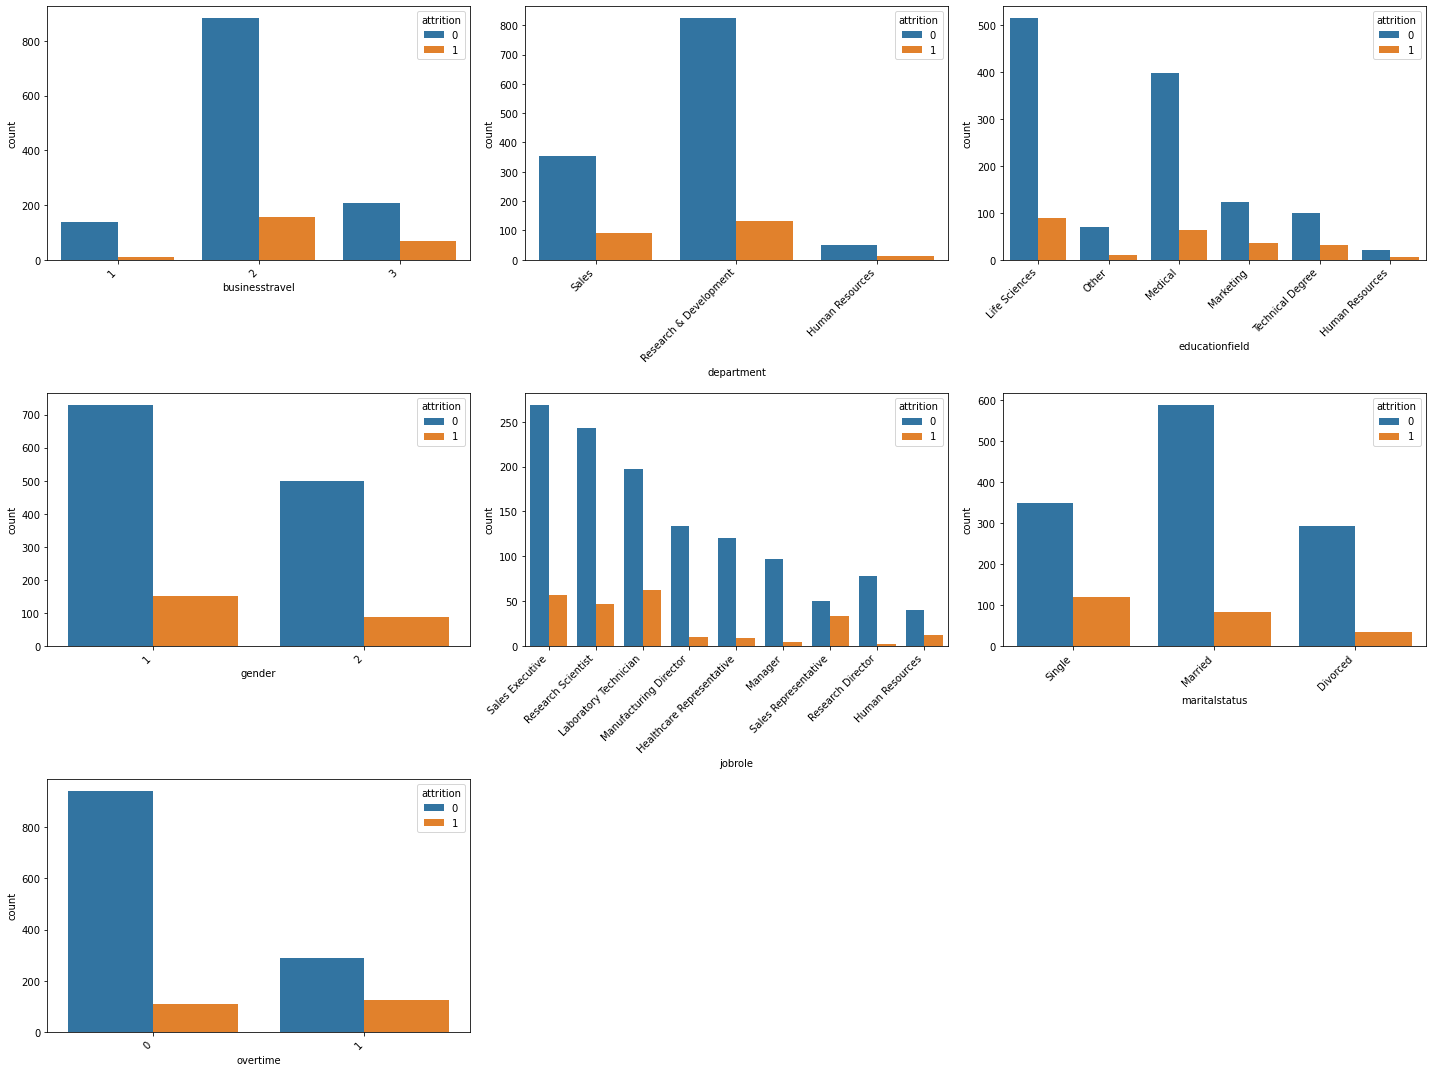

In [168]:
cols = 3
rows = 3
fig = plt.figure(figsize= (20,15))
all_cat = df_eda[categoricals]
cat_cols = df_eda[categoricals].columns

for i, col in enumerate(cat_cols): 
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=df[col], hue=df['attrition'], ax=ax)
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()
plt.show()

> Insight

- from `businesstravel`, the highest attrition seems to come from the one who rarely travel. However, it has highest non-attrition too. It looks like from this feature, the correlation to target seems low. This might not be a relevant feature. 
- `department` also has the same behavior to `businesstravel`. It seems to not have correlation. But the one with highest attrition comes from research and development.
- `educationfield` also have low correlation based on its graph. The highest attrition rate comes from 'Life Sciences'
- `gender` seems to have low influence to the attrition rate as well.
- `jobrole` seems to have correlation to `attrition`. Sales department seems to have high attrition rate. `Sales Executive` and `Sales Representative` have high attrition rate compared to others. But still, `Laboratory Technician` has the highest attrition rate.
- `maritalstatus` seems to have influence to attrition rate. Married ones seems to decide to stay more compared to the singles.
- `overtime` seems to have correlation to the attrition rate. The one who frequently overtime seems to have higher attrition rate.

> Chosen feature based on graph:
- `jobrole`
- `maritalstatus`
- `overtime`

> Plotting the relevant columns

> now let's proceed to numericals exploration...

<AxesSubplot:xlabel='jobrole', ylabel='count'>

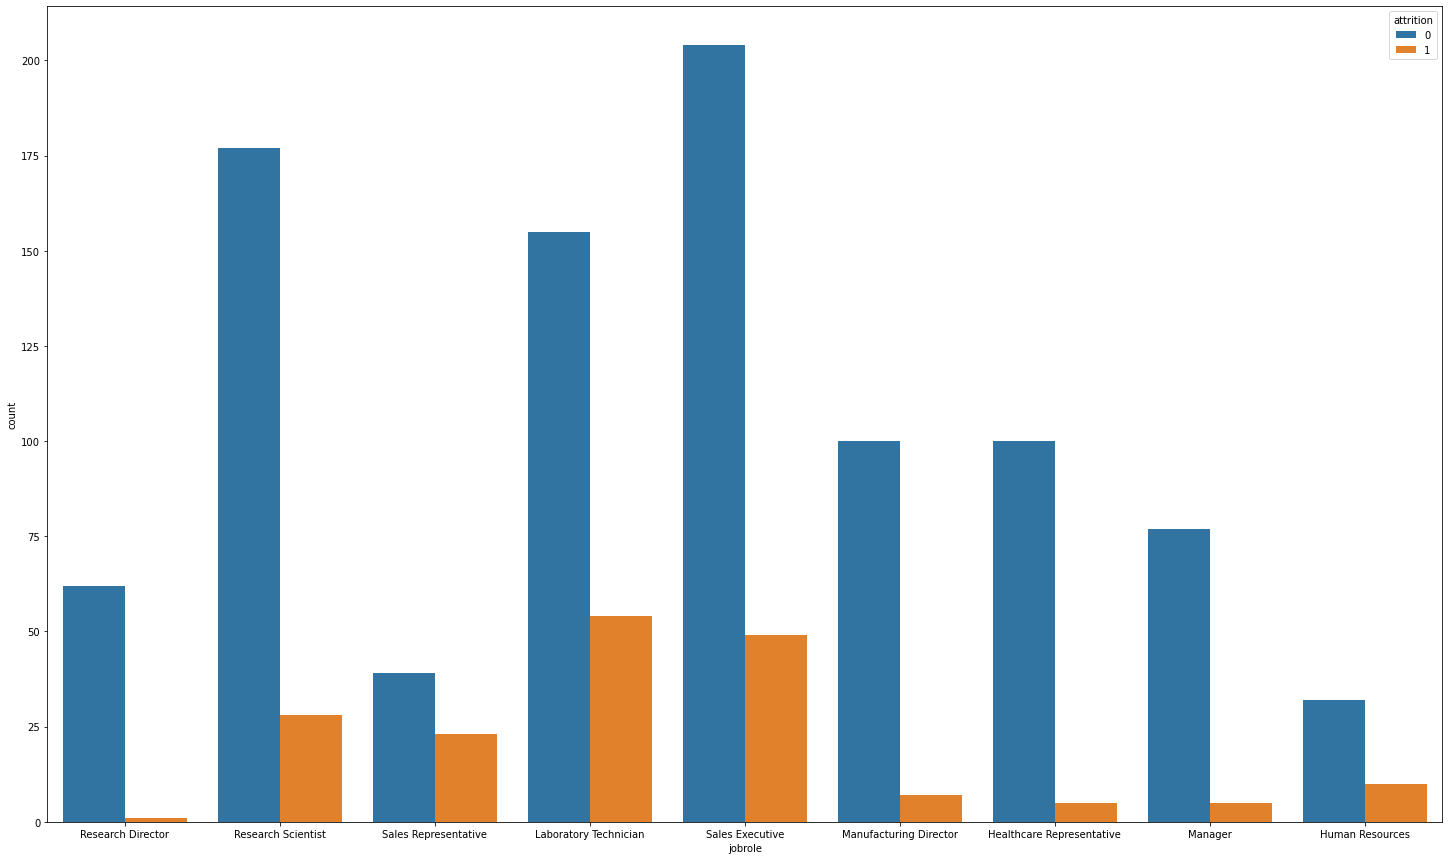

In [258]:
plt.figure(figsize= (25,15))
sns.countplot(x="jobrole", hue="attrition", data=df_eda)

> Insight:
- Laboratory Technician seems to have hight attrition rate followed by Sales Executive and Research Scientist. This needs to be investigate further for HR to see what is the problem within this department.


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

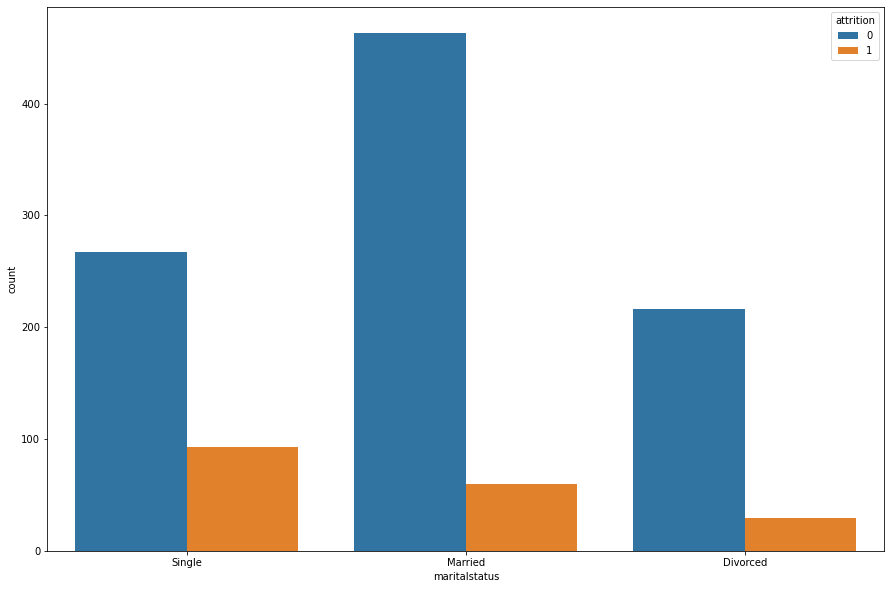

In [255]:
plt.figure(figsize= (15,10))
sns.countplot(x="maritalstatus", hue="attrition", data=df_eda)

> Insight:
- The one who is single tend to have high attrition rate compared to married and divorced.

> Assumptions:
- Singles tend to explore more and married needs more stability.

<AxesSubplot:xlabel='overtime', ylabel='count'>

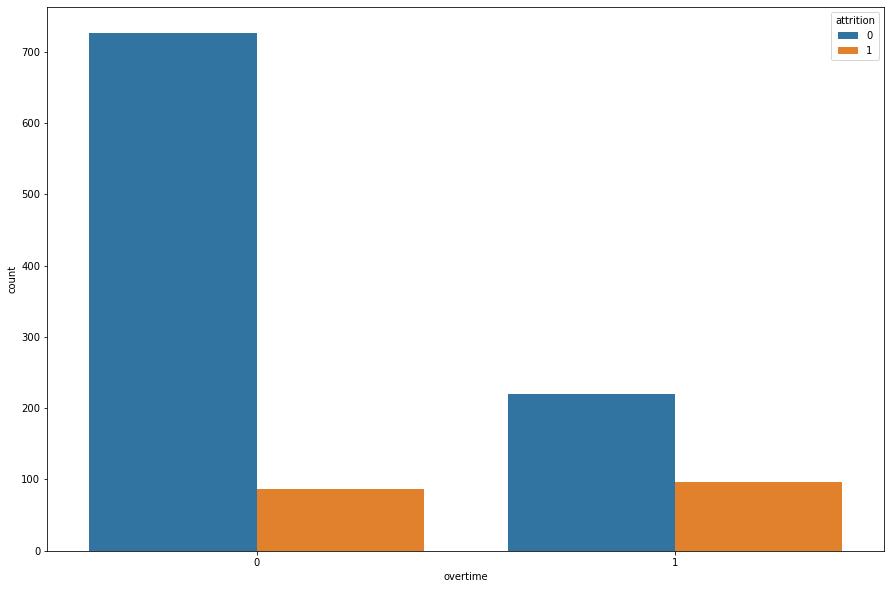

In [254]:
plt.figure(figsize= (15,10))
sns.countplot(x="overtime", hue="attrition", data=df_eda)

> Insight:
- Overtime seems to have a significant impact to attrition rate. The number of non-attrition is significantly lower in overtime worker yet the number of attrition rate has no sign of decreasing at all 

> **Numericals to Target**

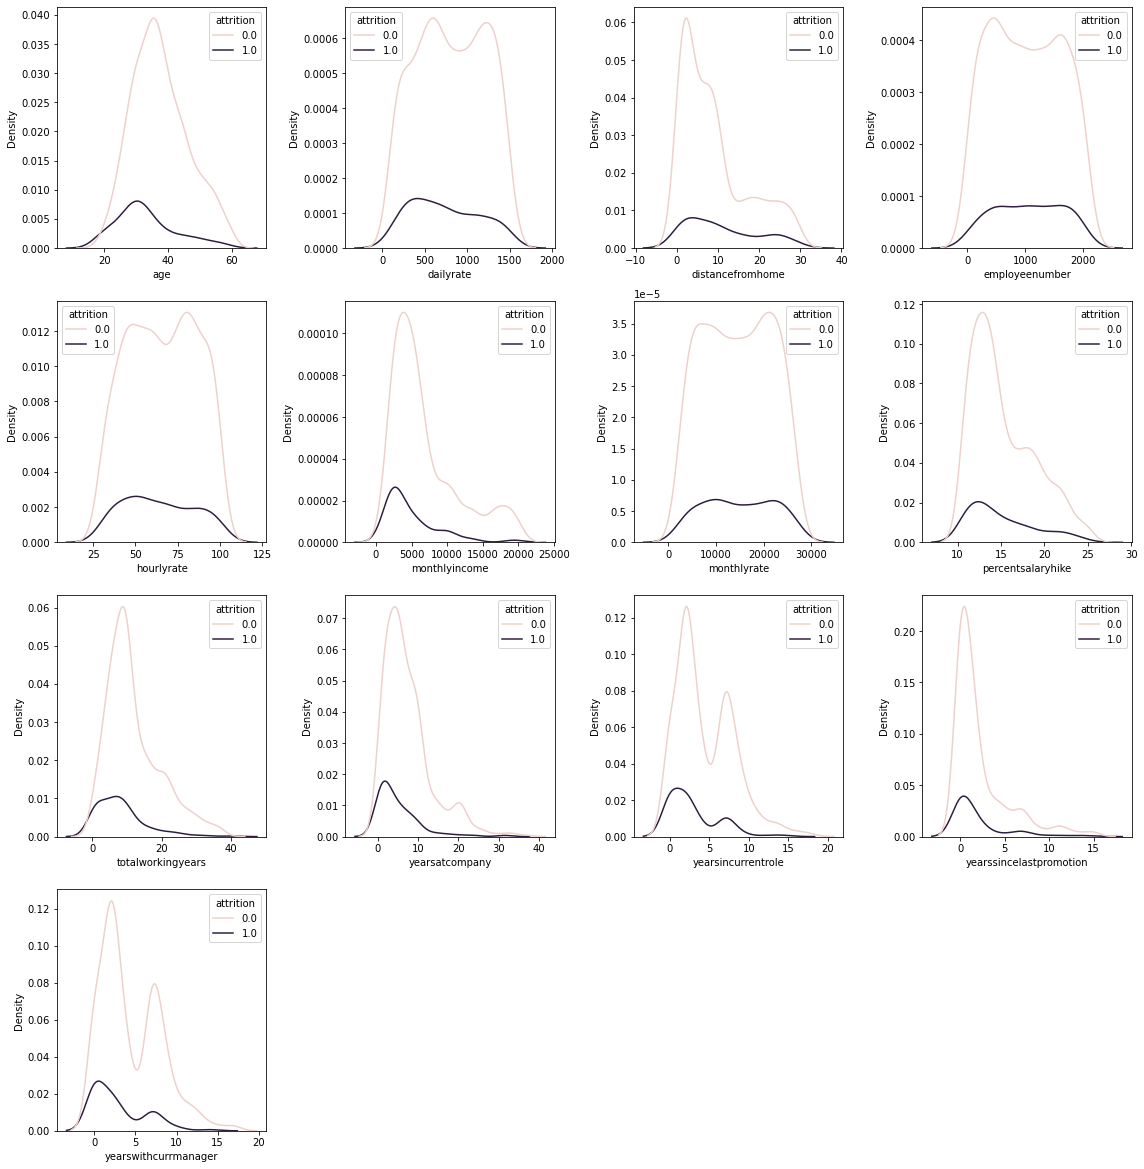

In [169]:
cols = 4
rows = 5
num_cols = df_eda[numericals].columns
fig = plt.figure( figsize=(cols*4, rows*4))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(x = df[col], hue=df_eda['attrition'], ax = ax)
    
fig.tight_layout()  
plt.show()

> Insight:
- it seems from `hourlyrate`, `dailyrate`, `percentsalaryhike`, `age`, `distancefromhome`, have a certain range where attrition is higher than no-attrition. For example, in `hourlyrate`, when it's too low or too high, the attrition rate is more than the non-attrition ones. These columns will be considered as possible feature.  

> plotting the significant column to see it more clearly

<AxesSubplot:xlabel='attrition', ylabel='distancefromhome'>

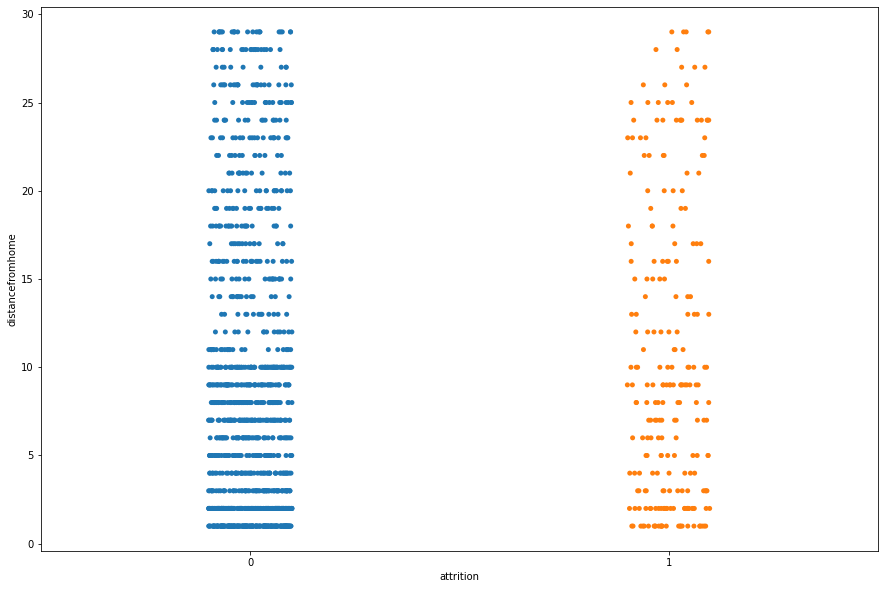

In [251]:
plt.figure(figsize= (15,10))
sns.stripplot(x="attrition", y="distancefromhome", data=df) 

<AxesSubplot:xlabel='attrition', ylabel='percentsalaryhike'>

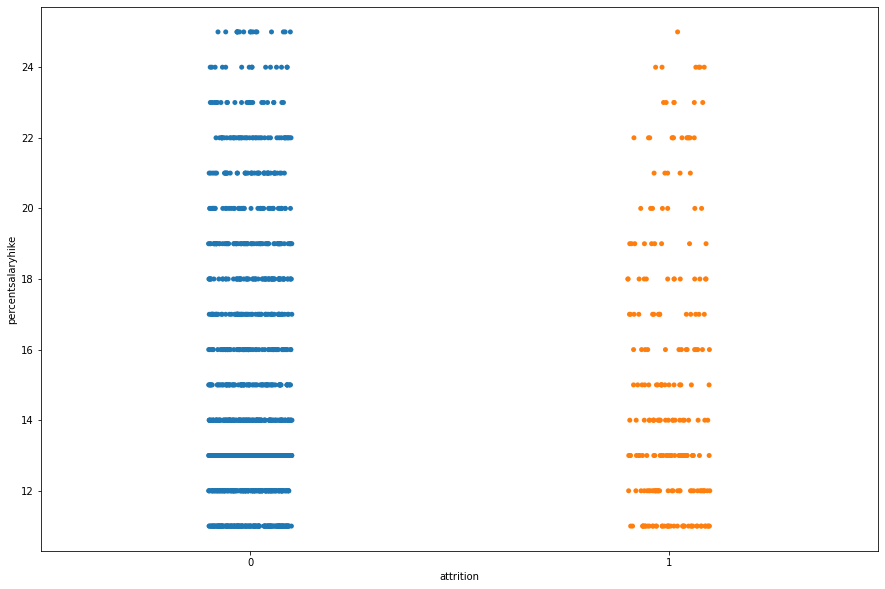

In [256]:
plt.figure(figsize= (15,10))
sns.stripplot(x="attrition", y="percentsalaryhike", data=df) 

> To confirm our assumptions, let's see the correlation heatmap to ensure the feature selection...

# **VI. Feature Selection**

## **1. Correlation Heatmap**

Encoding the string values first...

In [170]:
oe_encoder = OrdinalEncoder()
oe_encoder.fit(X_train)

X_train_enc = oe_encoder.transform(X_train)
X_train_enc = pd.DataFrame(X_train_enc, columns=X_train.columns)
X_train_enc


,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,19.0,1.0,159.0,1.0,6.0,3.0,3.0,57.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,929.0,1035.0,4.0,0.0,2.0,0.0,0.0,0.0,16.0,3.0,3.0,5.0,2.0,0.0,2.0
1,27.0,1.0,743.0,1.0,6.0,2.0,3.0,658.0,0.0,1.0,53.0,2.0,0.0,6.0,2.0,1.0,436.0,794.0,4.0,1.0,8.0,0.0,2.0,1.0,7.0,2.0,1.0,3.0,2.0,0.0,2.0
2,5.0,2.0,296.0,2.0,8.0,2.0,2.0,1106.0,3.0,0.0,3.0,2.0,0.0,8.0,0.0,1.0,22.0,1098.0,1.0,0.0,8.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0
3,40.0,1.0,102.0,1.0,1.0,3.0,1.0,466.0,3.0,0.0,1.0,2.0,4.0,5.0,1.0,2.0,1025.0,1054.0,7.0,1.0,1.0,0.0,3.0,0.0,39.0,2.0,2.0,30.0,15.0,13.0,8.0
4,11.0,2.0,361.0,2.0,23.0,2.0,5.0,1049.0,2.0,0.0,15.0,3.0,0.0,8.0,0.0,2.0,3.0,386.0,1.0,0.0,6.0,0.0,3.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,20.0,1.0,128.0,1.0,16.0,0.0,1.0,605.0,2.0,1.0,35.0,1.0,2.0,0.0,2.0,1.0,781.0,1015.0,0.0,0.0,7.0,0.0,0.0,1.0,20.0,4.0,1.0,19.0,9.0,1.0,9.0
1124,13.0,2.0,185.0,2.0,4.0,2.0,2.0,221.0,3.0,1.0,54.0,2.0,0.0,8.0,1.0,0.0,219.0,71.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0
1125,11.0,2.0,717.0,2.0,19.0,2.0,5.0,544.0,2.0,1.0,54.0,2.0,0.0,8.0,3.0,1.0,59.0,706.0,1.0,0.0,4.0,0.0,1.0,1.0,3.0,5.0,2.0,3.0,1.0,0.0,2.0
1126,12.0,0.0,713.0,1.0,2.0,2.0,1.0,327.0,2.0,0.0,23.0,2.0,0.0,2.0,3.0,1.0,45.0,645.0,4.0,0.0,4.0,0.0,2.0,1.0,9.0,3.0,0.0,5.0,3.0,1.0,4.0


In [171]:
df_eda_enc = X_train_enc.copy()
df_eda_enc['attrition'] = y_train
df_eda_enc.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,19.0,1.0,159.0,1.0,6.0,3.0,3.0,57.0,0.0,0.0,0.0,2.0,2.0,5.0,2.0,2.0,929.0,1035.0,4.0,0.0,2.0,0.0,0.0,0.0,16.0,3.0,3.0,5.0,2.0,0.0,2.0,1.0
1,27.0,1.0,743.0,1.0,6.0,2.0,3.0,658.0,0.0,1.0,53.0,2.0,0.0,6.0,2.0,1.0,436.0,794.0,4.0,1.0,8.0,0.0,2.0,1.0,7.0,2.0,1.0,3.0,2.0,0.0,2.0,0.0
2,5.0,2.0,296.0,2.0,8.0,2.0,2.0,1106.0,3.0,0.0,3.0,2.0,0.0,8.0,0.0,1.0,22.0,1098.0,1.0,0.0,8.0,0.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,0.0,NaN
3,40.0,1.0,102.0,1.0,1.0,3.0,1.0,466.0,3.0,0.0,1.0,2.0,4.0,5.0,1.0,2.0,1025.0,1054.0,7.0,1.0,1.0,0.0,3.0,0.0,39.0,2.0,2.0,30.0,15.0,13.0,8.0,NaN
4,11.0,2.0,361.0,2.0,23.0,2.0,5.0,1049.0,2.0,0.0,15.0,3.0,0.0,8.0,0.0,2.0,3.0,386.0,1.0,0.0,6.0,0.0,3.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0


> Calculating the correlation score...

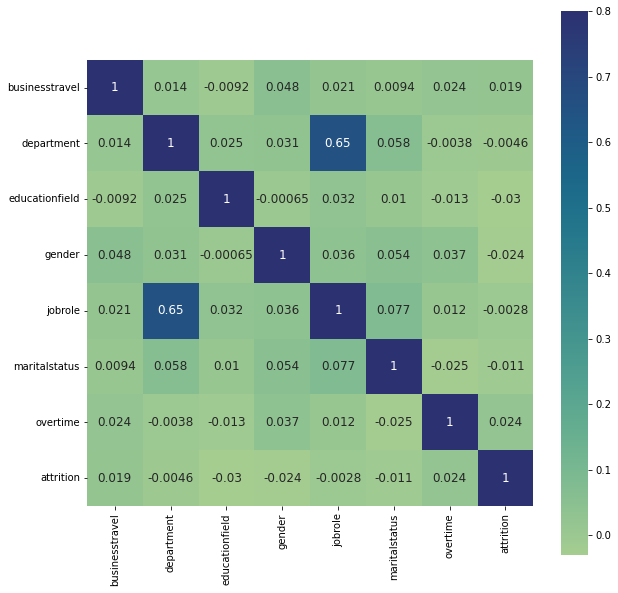

<Figure size 1440x1080 with 0 Axes>

In [172]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_eda_enc[categoricals+['attrition']].corr(method='kendall'), vmax=.8, square=True, annot=True, cmap='crest', annot_kws={"fontsize":12});

plt.figure(figsize=(20,15))
plt.show()

> Almost all of the features has low correlation score. If we take 0.03 as a treshold, then the chosen features are: `businesstravel`, `overtime`, `maritalstatus`, `gender` 

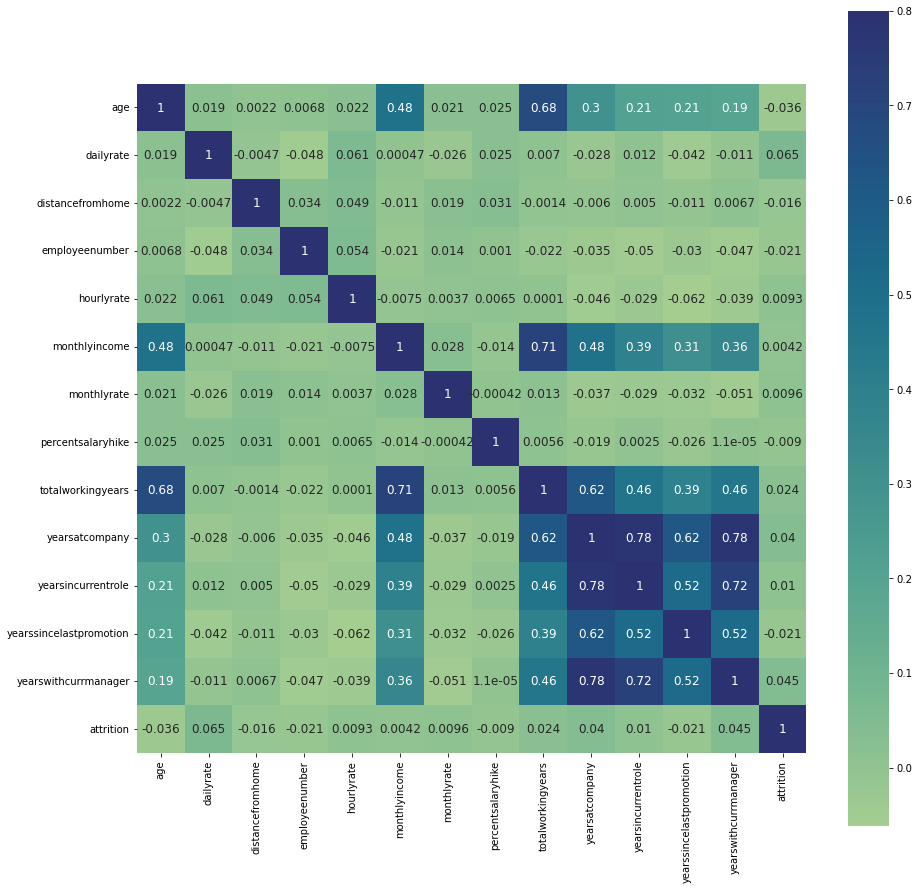

<Figure size 1080x1080 with 0 Axes>

In [173]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_eda_enc[numericals+['attrition']].corr(method='pearson'), vmax=.8, square=True, annot=True, cmap='crest', annot_kws={"fontsize":12});

plt.figure(figsize=(15,15))
plt.show()

> Insight:
- The correlation seems also too low in numericals, it pretty much the same to what we did in graph-based analysis. The only thing that needs to be added to feature if we set the treshold to 0.04 is `employeenumber` 


> Chosen feature:
- `jobrole`
- `maritalstatus`
- `overtime`
- `businesstravel` 
- `gender`
- `hourlyrate`
- `dailyrate`
- `percentsalaryhike`
- `age`
- `distancefromhome`
- `employeenumber`

In [174]:
X_train_final = X_train.copy()
X_train_final = X_train_final[['jobrole', 'maritalstatus', 'overtime','businesstravel',
                                'gender','hourlyrate','dailyrate','percentsalaryhike',
                                'age','distancefromhome','employeenumber']]
X_test_final = X_test[['jobrole', 'maritalstatus', 'overtime','businesstravel',
                                'gender','hourlyrate','dailyrate','percentsalaryhike',
                                'age','distancefromhome','employeenumber']]
df_inf = df_inf[['jobrole', 'maritalstatus', 'overtime','businesstravel',
                                'gender','hourlyrate','dailyrate','percentsalaryhike',
                                'age','distancefromhome','employeenumber','attrition']]

In [175]:
X_train_final.shape

(1128, 11)

# **VII. Data Preprocessing**

> Checking the outliers

hourlyrate skewness :  -0.032333221593943605
dailyrate skewness :  -0.000228951136387505
percentsalaryhike skewness :  0.8234186090132223
age skewness :  0.4136884718160982
distancefromhome skewness :  0.9570082696873601
employeenumber skewness :  0.017340254071176814


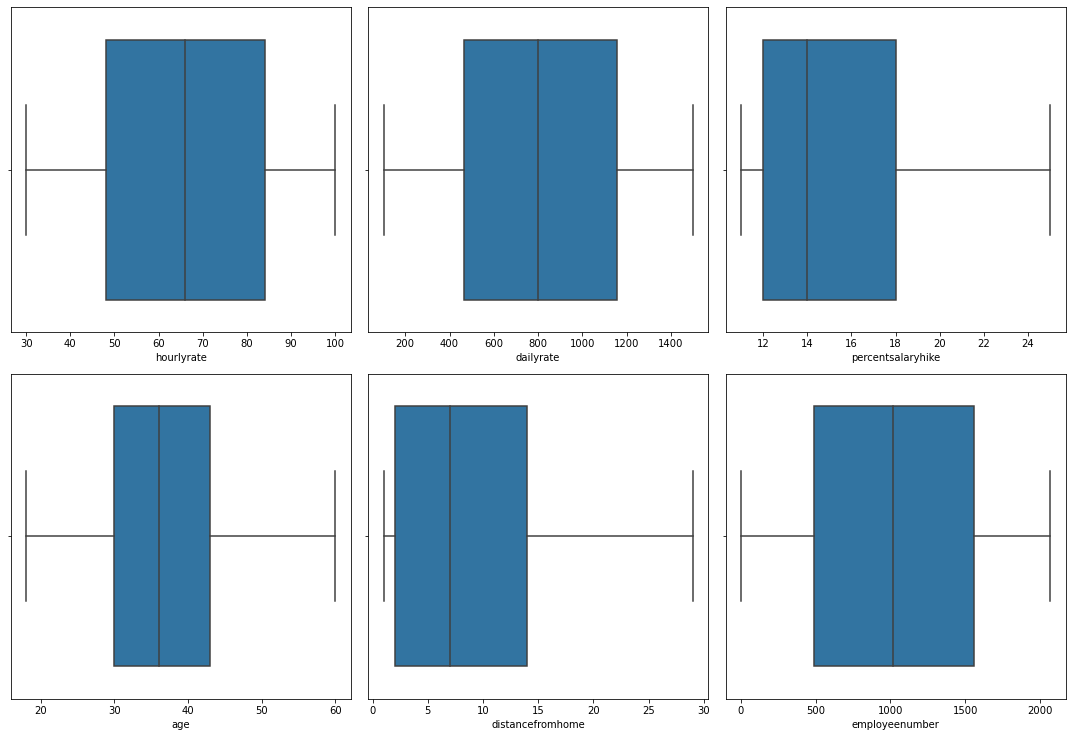

In [176]:
cols = 3
rows = 3
num_cols = X_train[['hourlyrate','dailyrate','percentsalaryhike',
               'age','distancefromhome','employeenumber']].columns
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = df[col], ax = ax)
    print(f'{col} skewness : ', df[col].skew())
    
fig.tight_layout()  
plt.show()

> Seems no outlier

> Proceeding to Feature Scaling and Encoding

# **Feature Scaling and Encoding**

In [177]:
X_train_final

,jobrole,maritalstatus,overtime,businesstravel,gender,hourlyrate,dailyrate,percentsalaryhike,age,distancefromhome,employeenumber
78,Research Director,Single,0,2,1,30,397,13,37,7,102
854,Research Scientist,Married,1,2,2,83,1457,19,45,7,1195
1438,Sales Representative,Married,0,3,1,33,638,19,23,9,2023
595,Research Director,Single,1,2,1,31,286,12,58,2,825
1365,Sales Representative,Single,0,3,1,45,746,17,29,24,1928
...,...,...,...,...,...,...,...,...,...,...,...
784,Healthcare Representative,Married,0,2,2,65,330,18,38,17,1088
292,Sales Representative,Divorced,0,3,2,84,444,11,31,5,399
697,Sales Representative,Married,0,3,2,84,1404,15,29,20,974
419,Laboratory Technician,Married,0,1,1,53,1400,15,30,3,562


> Creating the pipeline with 'mean' imputer (mostly have normal distribution) and minmax scaler (because the numericals have different unit) 

In [178]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())])

num_tr = num_pipeline.fit_transform(X_train_final[['hourlyrate','dailyrate','percentsalaryhike',
               'age','distancefromhome','employeenumber']])
num_tr

array([[0.        , 0.21116679, 0.14285714, 0.45238095, 0.21428571,
        0.04895783],
       [0.75714286, 0.96993558, 0.57142857, 0.64285714, 0.21428571,
        0.57876878],
       [0.04285714, 0.38367931, 0.57142857, 0.11904762, 0.28571429,
        0.98012603],
       ...,
       [0.77142857, 0.93199714, 0.28571429, 0.26190476, 0.67857143,
        0.47164324],
       [0.32857143, 0.92913386, 0.28571429, 0.28571429, 0.07142857,
        0.27193408],
       [0.97142857, 0.09019327, 0.21428571, 0.45238095, 0.17857143,
        0.18274358]])

> Setting the categoricals encoder pipeline

In [179]:
cat_pipeline = Pipeline([
        ('imputer_2', SimpleImputer(strategy='most_frequent')),
        ('ohe_enc', OneHotEncoder(sparse=False))])

cat_tr = cat_pipeline.fit_transform(X_train_final[['jobrole', 'maritalstatus', 'overtime','businesstravel',
                                                   'gender']])
cat_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

> Combining the scaler and encoder pipeline

In [181]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['hourlyrate','dailyrate','percentsalaryhike',
                               'age','distancefromhome','employeenumber']),
        ("cat_ohe", cat_pipeline, ['jobrole', 'maritalstatus', 'overtime','businesstravel',
                                   'gender'])])
train_tr = full_pipeline.fit_transform(X_train_final)
train_tr

array([[0.        , 0.21116679, 0.14285714, ..., 0.        , 1.        ,
        0.        ],
       [0.75714286, 0.96993558, 0.57142857, ..., 0.        , 0.        ,
        1.        ],
       [0.04285714, 0.38367931, 0.57142857, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.77142857, 0.93199714, 0.28571429, ..., 1.        , 0.        ,
        1.        ],
       [0.32857143, 0.92913386, 0.28571429, ..., 0.        , 1.        ,
        0.        ],
       [0.97142857, 0.09019327, 0.21428571, ..., 0.        , 1.        ,
        0.        ]])

> Applying the pipeline to test dataset.

In [182]:
test_tr = full_pipeline.transform(X_test_final)
test_tr

array([[0.07142857, 0.94846099, 0.14285714, ..., 0.        , 1.        ,
        0.        ],
       [0.72857143, 0.60629921, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.81428571, 0.35003579, 0.14285714, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.82857143, 0.82963493, 0.21428571, ..., 0.        , 1.        ,
        0.        ],
       [0.45714286, 0.78596994, 0.21428571, ..., 0.        , 1.        ,
        0.        ],
       [0.37142857, 0.51181102, 0.07142857, ..., 0.        , 1.        ,
        0.        ]])

In [183]:
test_tr_frame = pd.DataFrame(test_tr)
test_tr_frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.071429,0.948461,0.142857,0.285714,0.035714,0.095492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.728571,0.606299,0.000000,0.166667,0.000000,0.685410,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.814286,0.350036,0.142857,0.214286,0.035714,0.798352,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.742857,0.376521,0.071429,0.380952,0.250000,1.001939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.857143,0.627774,0.071429,0.309524,0.000000,0.148812,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.128571,0.797423,0.071429,0.357143,0.250000,0.327678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
333,0.657143,0.544023,0.071429,0.333333,0.035714,0.576345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
334,0.828571,0.829635,0.214286,0.476190,0.035714,0.130877,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
335,0.457143,0.785970,0.214286,0.333333,0.000000,0.762482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


> Now that the data has been encoded and scaled, proceeding to model definition...

# **VIII. Model Definition**

> For model defintion, we will choose:
- Logistic Regression
- Standard Vector Classification
- Random Forest Classifier
- Decision Tree Classifier
- N-Bayes

> From the model above, we will choose the best 'recall' value. The reasons are:
- We assume 1 ('yes' attrition, as positive) and 0 ('no' attrition, as negative)
- We don't want to predcit an employee has low attrition rate while in fact they have high chance of resignation (focusing on false negative)
- We also don't want to predict an employee has high attrition rate while in fact they have low chance of resignation. We need this to make HR work more efficiently. (Focusing also on false positive)
- In conclusion: We need a good recall score on both 1 and 0

> Defining the model...

In [184]:
logreg = LogisticRegression()
svm = SVC()
forest = RandomForestClassifier()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
nbayes = GaussianNB()

> Checking the score of each algorithm

## **1. Logistic Regression**

In [185]:
logreg.fit(train_tr, y_train)

logreg_train = logreg.predict(train_tr)
logreg_test = logreg.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, logreg_train))
print('======================== T E S T =========================')
print(classification_report(y_test, logreg_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       946
           1       0.73      0.24      0.36       182

    accuracy                           0.86      1128
   macro avg       0.80      0.61      0.64      1128
weighted avg       0.85      0.86      0.83      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       282
           1       0.62      0.18      0.28        55

    accuracy                           0.85       337
   macro avg       0.74      0.58      0.60       337
weighted avg       0.82      0.85      0.81       337



> Insight:
- Best fit.
- High recall score on 0 but extremely low on 1.

## **Support Vector Machine**

In [186]:
svm.fit(train_tr, y_train)

svm_train = svm.predict(train_tr)
svm_test = svm.predict(test_tr)
print('======================= T R A I N ======================')
print(classification_report(y_train, svm_train))
print('======================== T E S T =========================')
print(classification_report(y_test, svm_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       946
           1       0.84      0.21      0.33       182

    accuracy                           0.87      1128
   macro avg       0.86      0.60      0.63      1128
weighted avg       0.86      0.87      0.83      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       282
           1       0.64      0.16      0.26        55

    accuracy                           0.85       337
   macro avg       0.75      0.57      0.59       337
weighted avg       0.82      0.85      0.81       337



> Insight:
- Same as Logistic Regression.
- Best fit.
- High recall score on 0 but extremely low on 1.

## **Random Forest Classifier**

In [187]:
forest.fit(train_tr, y_train)

forest_train = forest.predict(train_tr)
forest_test = forest.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, forest_train))
print('======================== T E S T =========================')
print(classification_report(y_test, forest_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       1.00      1.00      1.00       182

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       282
           1       0.62      0.18      0.28        55

    accuracy                           0.85       337
   macro avg       0.74      0.58      0.60       337
weighted avg       0.82      0.85      0.81       337



> Insight:
- Overfit.
- On test dataset, it has high recall score on 0 and extremely low on 1.

## **KNN**

In [188]:
knn.fit(train_tr, y_train)

knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, knn_train))
print('======================== T E S T =========================')
print(classification_report(y_test, knn_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       946
           1       0.72      0.37      0.49       182

    accuracy                           0.88      1128
   macro avg       0.80      0.67      0.71      1128
weighted avg       0.86      0.88      0.86      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       282
           1       0.43      0.18      0.26        55

    accuracy                           0.83       337
   macro avg       0.65      0.57      0.58       337
weighted avg       0.79      0.83      0.80       337



> Insight:
- Same as Logistic Regression.
- Best fit.
- High recall score on 0 but extremely low on 1.

## **Decision Tree**

In [189]:
tree.fit(train_tr, y_train)

tree_train = tree.predict(train_tr)
tree_test = tree.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, tree_train))
print('======================== T E S T =========================')
print(classification_report(y_test, tree_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       1.00      1.00      1.00       182

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       282
           1       0.32      0.36      0.34        55

    accuracy                           0.77       337
   macro avg       0.60      0.61      0.60       337
weighted avg       0.78      0.77      0.78       337



> Insight:
- Overfit
- High recall score on 0 but extremely low on 1. However the `1` recall score is the highest so far.

> Let's continue our search...

## **N-Bayes**

In [190]:
nbayes.fit(train_tr, y_train)

nbayes_train = nbayes.predict(train_tr)
nbayes_test = nbayes.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, nbayes_train))
print('======================== T E S T =========================')
print(classification_report(y_test, nbayes_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       946
           1       0.31      0.77      0.44       182

    accuracy                           0.69      1128
   macro avg       0.63      0.72      0.61      1128
weighted avg       0.84      0.69      0.73      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       282
           1       0.27      0.67      0.39        55

    accuracy                           0.65       337
   macro avg       0.59      0.66      0.57       337
weighted avg       0.81      0.65      0.69       337



> Insight:
- Best fit.
- Moderately high recall score on 0 , and also moderately high on 1.
- We will choose this model since we want a model with high recall score.

> Proceeding to hyperparameter tuning...

# **Hyperparameter Tuning**

## **N-Bayes**

> Setting up the best parameter to Nbayes model using Grid Search

In [191]:
params_nbayes = {'var_smoothing': np.logspace(0,-9, num=100)} # creating 100 numbers starts from to the power of 0 until -9

gs_nbayes = GridSearchCV(estimator=nbayes, 
                        param_grid=params_nbayes, 
                        cv=5,
                        verbose=1, 
                        scoring='recall')

gs_nbayes.fit(train_tr, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall', verbose=1)

> Printing the best parameter, best score, and best estimator

In [192]:
print('Best Parameter   : ', gs_nbayes.best_params_)
print('Best Score       : ', gs_nbayes.best_score_)
print('Best Estimator   : ', gs_nbayes.best_estimator_)

Best Parameter   :  {'var_smoothing': 3.511191734215127e-05}
Best Score       :  0.775075075075075
Best Estimator   :  GaussianNB(var_smoothing=3.511191734215127e-05)


> Applying the best version of nbayes as main model

In [193]:
gs_nbayes_best = gs_nbayes.best_estimator_

In [194]:
gs_nbayes_best.fit(train_tr, y_train)

gs_nbayes_best_train = gs_nbayes_best.predict(train_tr)
gs_nbayes_best_test = gs_nbayes_best.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, gs_nbayes_best_train))
print('======================== T E S T =========================')
print(classification_report(y_test, gs_nbayes_best_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       946
           1       0.31      0.77      0.44       182

    accuracy                           0.69      1128
   macro avg       0.63      0.72      0.61      1128
weighted avg       0.84      0.69      0.73      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       282
           1       0.27      0.67      0.39        55

    accuracy                           0.65       337
   macro avg       0.59      0.66      0.57       337
weighted avg       0.81      0.65      0.69       337



> It seems don't have significant improvement after parameter tuning. Let's try to other model if they have a significant improvement after parameter tuning. In this case, I will try SVM since it has a good reputation for classification

## **SVM**

> Hyperparameter tuning on SVM

In [195]:
params_svm = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

gs_svm = GridSearchCV(SVC(),
                      params_svm,
                      refit=True,
                      verbose=2)
                      
gs_svm.fit(train_tr,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

> Printing the best parameter, best score, and estimator on SVM

In [196]:
print('Best Parameter   : ', gs_svm.best_params_)
print('Best Score       : ', gs_svm.best_score_)
print('Best Estimator   : ', gs_svm.best_estimator_)

Best Parameter   :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score       :  0.8537069813176007
Best Estimator   :  SVC(C=10, gamma=0.1)


> Setting up the best version of SVM as model

In [197]:
gs_svm_best = gs_svm.best_estimator_

> Applying the best svm to train set

In [198]:
gs_svm_best.fit(train_tr, y_train)

gs_svm_best_train = gs_svm_best.predict(train_tr)
gs_svm_best_test = gs_svm_best.predict(test_tr)

print('======================= T R A I N ======================')
print(classification_report(y_train, gs_svm_best_train))
print('======================== T E S T =========================')
print(classification_report(y_test, gs_svm_best_test))

======================= T R A I N ======================
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       946
           1       0.86      0.31      0.46       182

    accuracy                           0.88      1128
   macro avg       0.87      0.65      0.70      1128
weighted avg       0.88      0.88      0.86      1128

======================== T E S T =========================
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       282
           1       0.56      0.18      0.27        55

    accuracy                           0.84       337
   macro avg       0.71      0.58      0.59       337
weighted avg       0.81      0.84      0.81       337



> The model seems don't have any significant improvement. The recall score on 1 is stil very low. We will proceed to N-Bayes as our main model.

> Setting up the pipeline

In [199]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['hourlyrate', 'dailyrate',
                                  'percentsalaryhike', 'age',
                                  'distancefromhome', 'employeenumber']),
                                ('cat_ohe',
                                 Pipeline(steps=[('imputer_2',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe_enc',
                                                  OneHotEncoder(sparse=False))]),
                                 ['jobrole', 'maritalstatus', 'overtime',
                                  'businesstravel', 'gender'])])

## **Setting The Best Model Into Pipeline (N-Bayes)**

In [200]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", gs_nbayes_best)
])

all_process.fit(X_train_final, y_train)
test_predict = all_process.predict(X_test)

print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       282
           1       0.27      0.67      0.39        55

    accuracy                           0.65       337
   macro avg       0.59      0.66      0.57       337
weighted avg       0.81      0.65      0.69       337



> Now that we finished our whole modeling process, let's apply it to inference dataset

# **Inferencing**

In [201]:
df_inf

,jobrole,maritalstatus,overtime,businesstravel,gender,hourlyrate,dailyrate,percentsalaryhike,age,distancefromhome,employeenumber,attrition
767,Healthcare Representative,Single,0,2,2,35,124,15,37,3,1062,0
976,Manufacturing Director,Married,1,2,1,68,1369,12,56,23,1373,0
35,Research Scientist,Divorced,0,2,2,72,1273,12,43,2,46,0
169,Research Scientist,Single,0,2,1,43,120,20,32,6,231,0
978,Healthcare Representative,Divorced,0,2,2,89,1202,20,40,2,1375,0


> Separating the X from Y

In [210]:
df_inf_x = df_inf.drop(['attrition'], axis=1)
df_inf_y = df_inf['attrition']

> Printing the prediction with the designed pipeline

In [212]:
prediction = all_process.predict(df_inf_x)
df_inf['prediction'] = prediction

> Printing the comparison

In [213]:
df_inf

,jobrole,maritalstatus,overtime,businesstravel,gender,hourlyrate,dailyrate,percentsalaryhike,age,distancefromhome,employeenumber,attrition,prediction
767,Healthcare Representative,Single,0,2,2,35,124,15,37,3,1062,0,0
976,Manufacturing Director,Married,1,2,1,68,1369,12,56,23,1373,0,0
35,Research Scientist,Divorced,0,2,2,72,1273,12,43,2,46,0,0
169,Research Scientist,Single,0,2,1,43,120,20,32,6,231,0,1
978,Healthcare Representative,Divorced,0,2,2,89,1202,20,40,2,1375,0,0


# **Conclusion**

> From the whole process we can have can conclude:

- Based on inference test, we reached our aim to focus on the recall score. We predicted 4 out of 5 attrition rate.
- However, we still need to improve the recall score.
- To improve the recall score, there's a note that needs attention:
    - Since the correlation score on feature is too low, we need more relevant feature to predict the attrition rate.
    - From this project, we can begin our search for best feature when HR do the interview for the people who has possibility of attrition
    - From HR information, we can begin our survey and improve our feature variables.
- We confident that this model is useful as a stepping stone to make a reliable attrition prediction.